In [2]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import uproot
import uproot3
import R2h_module as r2h
import root_pandas as rpd
from root_pandas import read_root
from matplotlib import rc

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'

Welcome to JupyROOT 6.22/09


# Get data from Ntuples to dataframes

In [3]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

# Getting Data

In [71]:
%%time
df = {}
df_trigger = {}
#path_data="/home/seba/CreatePairTuples"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    df['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    df_trigger['%s_trigger'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    df_trigger['D_%s_trigger'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C
Get trigger dataframes from deuterium target C
Getting dataframes from target Fe
Get trigger dataframes from deuterium target Fe
Getting dataframes from target Pb
Get trigger dataframes from deuterium target Pb
CPU times: user 5.49 s, sys: 76.7 ms, total: 5.57 s
Wall time: 5.57 s


# Getting MC (reco)

In [5]:
%%time
df_mc = {}
df_mc_trigger = {}
path_mc="/home/seba/CreatePairTuples"

for target in ['C','D', 'Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df_mc[target]=getdatainChunks('%s/MC_Pairs_%s.root'%(path_mc,target), target)
    df_mc_trigger['%s_trigger'%target] = getdatainChunks('%s/MC_Pairs_%s.root'%(path_mc,target), 
                                                         '%s_trigger'%target)

Getting dataframes from target C
Getting dataframes from target D
Getting dataframes from target Fe
Getting dataframes from target Pb
CPU times: user 29 s, sys: 4.76 s, total: 33.8 s
Wall time: 33.8 s


In [ ]:
#print(df_mc['C'].keys())
df_mc['C'].hist(figsize=(12,12),bins=100,column=['nu','W','Q2','h2_pid', 'h1_pid','h1_th', 'h2_th'])


# Getting GiBUU

In [90]:
%%time

pathGIBUU="/home/miguel/eg2dihadron/"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    df_trigger['GiBUU_%s_trigger'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    df['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (df.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])
CPU times: user 15.8 s, sys: 186 ms, total: 15.9 s
Wall time: 15.9 s


In [ ]:
print (df['GiBUU_Fe'].keys())
df['GiBUU_Fe'].eval('Xb=Q2/(2*0.938272*nu)', inplace=True)
df['GiBUU_Fe'].hist(figsize=(12,12),bins=100,column=['Xb','nu','W','Q2','h2_pid', 'h1_pid','h1_z', 'h2_th'])
plt.show()

# Combine the D2 data-sets

In [ ]:
#df['D'] = df['D_Fe']
#df_trigger['D_trigger'] = df_trigger['D_Fe_trigger']
 #df['D'] = pd.concat([df['D_Fe']) #simply combine the deuterium results for all targets
#df_trigger['D_trigger'] = pd.concat([df_trigger['D_Fe_trigger']]) #simply combine the deuterium results for all targets

#print (df.keys())
#print(df['Fe'].keys())
#print(df_trigger['Fe_trigger'].keys())
## this is just to notice that there are no vectors in the variables, all of them are numbers
#print(df['Fe'].describe())
#print('there are ',len(df['Fe']), 'entries')

watching some distributions

In [ ]:
#df['Fe'].hist(figsize=(12,12),bins=100,column=['dphi','dphi_lab','h2_cm_th','h2_pid'])
#plt.show()

# Apply selection to datasets
**Here are applied the cuts for GiBUU**

In [91]:
%%time
for key in df.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    df[key] = r2h.applyCuts(df[key],isMC=isMC)
    df[key] = r2h.applyCutsPair(df[key],isMC=isMC)


key:  C
Entries before cut  129233
Q2>1.0 and Q2<4.0 129233  (100.00  %)
h1_p<5.0  129233  (100.00  %)
inelasticity < 0.85 129233  (100.00  %)
h1_pid = pions (trigger) 129233  (100.00  %)
Nu>2.2 and Nu<4.2 129233  (100.00  %)
h1_z <1.0 129233  (100.00  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 129233  (100.00  %)
2.2 < nu < 4.2 129233  (100.00  %)
h1_p<5 GeV  129233  (100.00  %)
h2_p<5 GeV 129233  (100.00  %)
secondary hadrons are pions 129233  (100.00  %)
leading hadrons are pions 129233  (100.00  %)
0.2<h2_p<5.0 129233  (100.00  %)
0.2<h1_p<5.0 129233  (100.00  %)
h2_z<1.0 129233  (100.00  %)
h1_z<1.0 129233  (100.00  %)
10<h2_th<120 129233  (100.00  %)
Theta/P fiducial region selected 129233  (100.00  %)
10< h1_th<120 129233  (100.00  %)
Theta/P fiducial region selected for trigger 129233  (100.00  %)

key:  D_C
Entries before cut  182301
Q2>1.0 and Q2<4.0 182301  (100.00  %)
h1_p<5.0  182301  (100.00  %)
inelasticity < 0.85 182301  (100.00  %)
h1_pid = pions (

In [92]:
for key in df_trigger.keys():
    print (key)
    df_trigger[key] = r2h.applyCuts(df_trigger[key],isTrigger=True)
    print (' ')

C_trigger
Entries before cut  642418
Q2>1.0 and Q2<4.0 642418  (100.00  %)
h1_p<5.0  642418  (100.00  %)
inelasticity < 0.85 642418  (100.00  %)
h1_pid = pions (trigger) 642418  (100.00  %)
Nu>2.2 and Nu<4.2 642418  (100.00  %)
h1_z <1.0 642418  (100.00  %)
 
D_C_trigger
Entries before cut  862386
Q2>1.0 and Q2<4.0 862386  (100.00  %)
h1_p<5.0  862386  (100.00  %)
inelasticity < 0.85 862386  (100.00  %)
h1_pid = pions (trigger) 862386  (100.00  %)
Nu>2.2 and Nu<4.2 862386  (100.00  %)
h1_z <1.0 862386  (100.00  %)
 
Fe_trigger
Entries before cut  752018
Q2>1.0 and Q2<4.0 752018  (100.00  %)
h1_p<5.0  752018  (100.00  %)
inelasticity < 0.85 752018  (100.00  %)
h1_pid = pions (trigger) 752018  (100.00  %)
Nu>2.2 and Nu<4.2 752018  (100.00  %)
h1_z <1.0 752018  (100.00  %)
 
D_Fe_trigger
Entries before cut  1279672
Q2>1.0 and Q2<4.0 1279672  (100.00  %)
h1_p<5.0  1279672  (100.00  %)
inelasticity < 0.85 1279672  (100.00  %)
h1_pid = pions (trigger) 1279672  (100.00  %)
Nu>2.2 and Nu<4.2 1

# Apply selection to MC

In [9]:
%%time
for key in df_mc.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print (key)
    df_mc[key] = r2h.applyCuts(df_mc[key],isMC=isMC)
    df_mc[key] = r2h.applyCutsPair(df_mc[key],isMC=isMC)    
    df_mc[key] = r2h.applyCuts(df_mc[key],isMC=isMC)
    df_mc[key] = r2h.applyCutsPair(df_mc[key],isMC=isMC)

C
Entries before cut  2153884
Q2>1.0 and Q2<4.0 2153884  (100.00  %)
h1_p<5.0  2153883  (100.00  %)
inelasticity < 0.85 2153883  (100.00  %)
h1_pid = pions (trigger) 675859  (31.38  %)
Nu>2.2 and Nu<4.2 661810  (97.92  %)
h1_z <1.0 661782  (100.00  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 661782  (100.00  %)
2.2 < nu < 4.2 661782  (100.00  %)
h1_p<5 GeV  661782  (100.00  %)
h2_p<5 GeV 661782  (100.00  %)
secondary hadrons are pions 315816  (47.72  %)
leading hadrons are pions 315816  (100.00  %)
0.2<h2_p<5.0 315816  (100.00  %)
0.2<h1_p<5.0 315816  (100.00  %)
h2_z<1.0 315816  (100.00  %)
h1_z<1.0 315816  (100.00  %)
10<h2_th<120 315816  (100.00  %)
Theta/P fiducial region selected 315816  (100.00  %)
10< h1_th<120 315816  (100.00  %)
Theta/P fiducial region selected for trigger 315816  (100.00  %)
Entries before cut  315816
Q2>1.0 and Q2<4.0 315816  (100.00  %)
h1_p<5.0  315816  (100.00  %)
inelasticity < 0.85 315816  (100.00  %)
h1_pid = pions (trigger) 315816  

In [10]:
for key in df_mc_trigger.keys():
    print (key)
    df_mc_trigger[key] = r2h.applyCuts(df_mc_trigger[key],isTrigger=True)
    print (' ')

C_trigger
Entries before cut  6089605
Q2>1.0 and Q2<4.0 6089605  (100.00  %)
h1_p<5.0  6089597  (100.00  %)
inelasticity < 0.85 6089597  (100.00  %)
h1_pid = pions (trigger) 2407780  (39.54  %)
Nu>2.2 and Nu<4.2 2375046  (98.64  %)
h1_z <1.0 2374309  (99.97  %)
 
D_trigger
Entries before cut  6209074
Q2>1.0 and Q2<4.0 6209074  (100.00  %)
h1_p<5.0  6209063  (100.00  %)
inelasticity < 0.85 6209063  (100.00  %)
h1_pid = pions (trigger) 2433455  (39.19  %)
Nu>2.2 and Nu<4.2 2400600  (98.65  %)
h1_z <1.0 2399845  (99.97  %)
 
Fe_trigger
Entries before cut  5655162
Q2>1.0 and Q2<4.0 5655162  (100.00  %)
h1_p<5.0  5655151  (100.00  %)
inelasticity < 0.85 5655151  (100.00  %)
h1_pid = pions (trigger) 2239295  (39.60  %)
Nu>2.2 and Nu<4.2 2208274  (98.61  %)
h1_z <1.0 2207637  (99.97  %)
 
Pb_trigger
Entries before cut  5957337
Q2>1.0 and Q2<4.0 5957337  (100.00  %)
h1_p<5.0  5957328  (100.00  %)
inelasticity < 0.85 5957328  (100.00  %)
h1_pid = pions (trigger) 2360420  (39.62  %)
Nu>2.2 and N

**Checking some distributions**

In [ ]:
print (df['GiBUU_Fe'].keys())
df_mc['Fe'].eval('Xb=Q2/(2*0.938272*nu)', inplace=True)
df_mc['Fe'].hist(figsize=(12,12),bins=100,column=['Xb','nu','W','Q2','h2_pid', 'h1_pid','h1_z', 'h2_th'])
plt.show()


# R_2h data from HERMES and Neutrino buble-chamber experiment

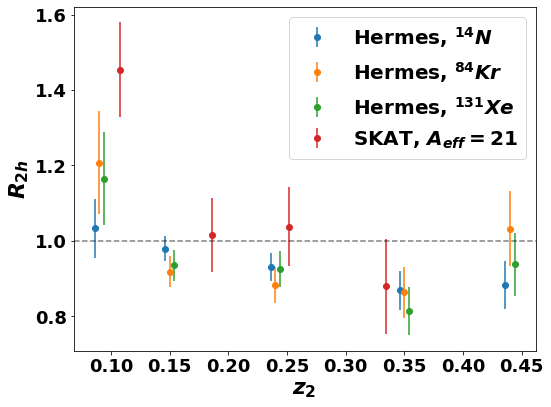

In [11]:
#hermes data:
hermes_y = {}
hermes_ystat = {}
hermes_ysyst = {}
hermes_ytotal = {}

#DATA FROM SELECTIO1 OF http://www-hermes.desy.de/notes/pub/publications.html
hermes_x = {}
hermes_x['Kr'] = [0.09,0.15,0.24,0.35,0.44]
hermes_x['N'] = np.subtract(hermes_x['Kr'],0.004)
hermes_x['Xe'] = np.subtract(hermes_x['Kr'],-0.004)

#nitrogen, atomic number 7
hermes_y['N']     = [1.0324, 0.9781,0.9293,0.8678,0.8822]
hermes_ystat['N'] = [0.0767,0.0268,0.0323,0.0478,0.0601]
hermes_ysyst['N'] = [0.0206,0.0196,0.0186,0.0174,0.0176]
hermes_ytotal['N'] = np.sqrt(np.power(hermes_ystat['N'],2.0)+np.power(hermes_ysyst['N'],2.0))

#krypton, atomic number 36
hermes_y['Kr'] = [1.2072,0.9180,0.8822,0.8631,1.0314]
hermes_ystat['Kr'] = [0.1342,0.0366,0.0452,0.0661,0.0972]
hermes_ysyst['Kr'] =[0.0241,0.0184,0.0176,0.0173,0.0206]
hermes_ytotal['Kr'] = np.sqrt(np.power(hermes_ystat['Kr'],2.0)+np.power(hermes_ysyst['Kr'],2.0))

hermes_y['Xe'] = [1.1648,0.9345,0.9242,0.8128,0.9373]
hermes_ystat['Xe'] = [0.1205,0.0359,0.0433,0.0614,0.0808]
hermes_ysyst['Xe'] = [0.0233,0.0187,0.0185,0.0163,0.0187]
hermes_ytotal['Xe'] = np.sqrt(np.power(hermes_ystat['Xe'],2.0)+np.power(hermes_ysyst['Xe'],2.0))

neutrino_x = [0.10763636363636367, 0.18618181818181817,0.25163636363636366,0.3345454545454546]
neutrino_y = [1.4535664335664338, 1.0148378893833438,  1.0373426573426574, 0.8784361093452003]
neutrino_yerror =[1.5794405594405596, 1.112739987285442, 1.1422377622377624,1.004310235219326]
neutrino_yerror = np.subtract(neutrino_yerror,neutrino_y)

fig = plt.figure(figsize=(8,6))

plt.errorbar(hermes_x['N'], hermes_y['N'],yerr=hermes_ytotal['N'],label='Hermes, $^{14}N$',fmt='o')
plt.errorbar(hermes_x['Kr'], hermes_y['Kr'],yerr=hermes_ytotal['Kr'],label='Hermes, $^{84}Kr$',fmt='o')
plt.errorbar(hermes_x['Xe'], hermes_y['Xe'],yerr=hermes_ytotal['Xe'],label='Hermes, $^{131}Xe$',fmt='o')
plt.errorbar(neutrino_x, neutrino_y,yerr=neutrino_yerror,label='SKAT, $A_{eff}=21$',fmt='o')
plt.xlabel('$z_{2}$',fontsize=22)
plt.ylabel('$R_{2h}$',fontsize=22)
plt.axhline(y=1.0,color='black',linestyle='--',alpha=0.5)

plt.tight_layout()
plt.legend(frameon=True)
#plt.savefig('PreviousData.png')
#plt.savefig('PreviousData_R2h.pdf')

plt.show()



In [12]:
p_thr=2.7
Nphe_thr=15
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

pair_cut_nom  ='and h1_z>0.5 and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h2_FidCut==1 and %s and %s and %s and %s and %s and %s'%(Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
trigger_cut_nom   ='h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)



Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  a

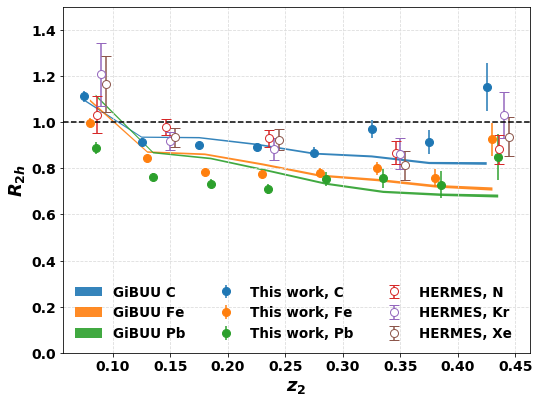

In [13]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                        pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting


    
for i,target in enumerate(['C','Fe','Pb']):    
#plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
#alpha=0.99,color=colors[target])
#plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = '')
    #plt.fill_between(x,r,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
    #plt.plot(x,r,label='GiBUU %s'%target,alpha=0.79,lw=3,color=colors[target])
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,fmt='o',ms=8)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)


plt.errorbar(hermes_x['N'], hermes_y['N'],yerr=hermes_ytotal['N'],fmt='o',mfc='white',
             label='HERMES, N',fillstyle=None,ms=8,capsize=5)
plt.errorbar(hermes_x['Kr'], hermes_y['Kr'],yerr=hermes_ytotal['Kr'],fmt='o',mfc='white',
             label='HERMES, Kr',fillstyle=None,ms=8,capsize=5)
plt.errorbar(hermes_x['Xe'], hermes_y['Xe'],yerr=hermes_ytotal['Xe'],fmt='o',mfc='white',
             label='HERMES, Xe',fillstyle=None,ms=8,capsize=5)
#plt.errorbar(neutrino_x, neutrino_y,yerr=neutrino_yerror,fmt='s',mfc='white',
            #label='Neutrino, $A_{eff}=21$',fillstyle=None,ms=8,capsize=5)

plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=3 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)


plt.savefig('ComparisonWithHermes_Linear.pdf', bbox_inches='tight')
plt.show()

**Comparison with single-hadron suppression**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  a

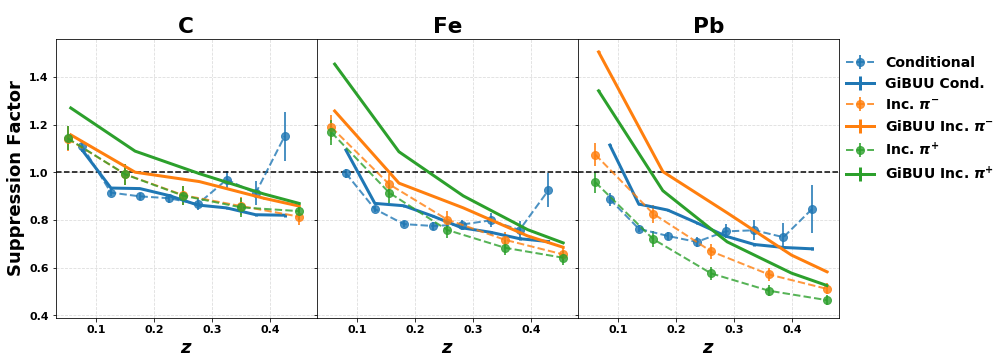

In [44]:
x_data_singleHadron = np.array([0.05,0.15,0.25,0.35,0.45])
y_data_singleHadron = {}
erry_data_singleHadron  ={}

y_data_singleHadron['pip_C'] = np.array([1.14377 , 0.991528 , 0.902358 , 0.853406 , 0.837642 ])
erry_data_singleHadron['pip_C'] = np.array([0.00311613 , 0.00157512 , 0.001843 , 0.00229271 , 0.00291008 ])
y_data_singleHadron['pip_Fe'] = np.array([1.16785 , 0.914393 , 0.758705 , 0.683655 , 0.642149 ])
erry_data_singleHadron['pip_Fe'] = np.array([0.00285128 , 0.00131102 , 0.00141581 , 0.00169536 , 0.00206393  ])
y_data_singleHadron['pip_Pb'] = np.array([0.958606 , 0.719983 , 0.57628 , 0.503447 , 0.464043  ])
erry_data_singleHadron['pip_Pb'] = np.array([0.00273899 , 0.00124261 , 0.00132827 , 0.00159042 , 0.00194019 ])

x_data_pim_singleHadron = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75])

y_data_singleHadron['pim_C'] = np.array([ 1.14172 , 0.992301 , 0.904382 , 0.858762 , 0.814561 ])
erry_data_singleHadron['pim_C'] = np.array([0.0054489 , 0.00266114 , 0.00303142 , 0.00430438 , 0.00651458  ])
y_data_singleHadron['pim_Fe'] = np.array([1.18926 , 0.949964 , 0.802236 , 0.717104 , 0.656101 ])
erry_data_singleHadron['pim_Fe'] = np.array([0.00532453 , 0.00237637 , 0.00250118 , 0.00334693 , 0.00490003  ])
y_data_singleHadron['pim_Pb'] = np.array([1.07461 , 0.826597 , 0.668954 , 0.571658 , 0.511301 ]) 
erry_data_singleHadron['pim_Pb'] = np.array([0.00523426 , 0.00230227 , 0.00241594 , 0.00321067 , 0.00467534  ])


y_GiBUU_singleHadron = {}
erry_GiBUU_singleHadron  ={}
x_GiBUU_singleHadron = np.array([0.05555556 ,0.16666667 ,0.27777778 ,0.38888889, 0.45  ])


y_GiBUU_singleHadron['pip_C']=np.array([1.2706959,  1.08947724, 0.99504182, 0.90983822, 0.87008815])
y_GiBUU_singleHadron['pip_Fe']=np.array([1.45474057, 1.08676467, 0.90162779, 0.75997446, 0.70464241])
y_GiBUU_singleHadron['pip_Pb']=np.array([1.34267664, 0.92325242 ,0.70871029, 0.57738503, 0.52548756])
y_GiBUU_singleHadron['pim_C']=np.array([1.15775933 ,1.00102127, 0.96162586, 0.89191957, 0.85893181])
y_GiBUU_singleHadron['pim_Fe']=np.array([1.25795649 ,0.95501298, 0.85133908, 0.73355979, 0.68619796])
y_GiBUU_singleHadron['pim_Pb']=np.array([1.50585669 ,1.00346182, 0.83044466, 0.65311636, 0.58317362])

erry_GiBUU_singleHadron['pip_C']=np.array([0.00178479 ,0.00118499 ,0.00151467, 0.00174534, 0.00196202])
erry_GiBUU_singleHadron['pip_Fe']=np.array([0.00225931, 0.00137018 ,0.0016492 , 0.00181247, 0.00200441])
erry_GiBUU_singleHadron['pip_Pb']=np.array([0.00193688, 0.00109174, 0.0012368,  0.00132385, 0.00144436])
erry_GiBUU_singleHadron['pim_C']=np.array([0.00149382 ,0.00100624, 0.00145127, 0.0018199,  0.00216692])
erry_GiBUU_singleHadron['pim_Fe']=np.array([0.00182938, 0.00113482, 0.00155974, 0.00187395, 0.00219665])
erry_GiBUU_singleHadron['pim_Pb']=np.array([0.00191197, 0.00105352, 0.00136291 ,0.00152573, 0.0017285])

 #totalerror = np.sqrt(np.power(np.array(erry_data['pip_%s'%target]),2) + 
 #                        np.power(np.array(y_data['pip_%s'%target])*sysError,2))

sysError=0.045
for i, target in enumerate(['C','Fe','Pb']):
    erry_data_singleHadron['pip_%s'%target] = np.sqrt(np.power(np.array(erry_data_singleHadron['pip_%s'%target]),2) + 
                                           np.power(np.array(y_data_singleHadron['pip_%s'%target])*sysError,2))


sysError=0.045
for i, target in enumerate(['C','Fe','Pb']):
    erry_data_singleHadron['pim_%s'%target] = np.sqrt(np.power(np.array(erry_data_singleHadron['pim_%s'%target]),2) + 
                                           np.power(np.array(y_data_singleHadron['pim_%s'%target])*sysError,2))

colors=['','#1f77b4','#ff7f0e','#2ca02c']


alpha_value=0.8

fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})


for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z',
                            pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom)
    if i==0:    
        axs[i].errorbar(x+0.005*i,r,yerr=err,label='Conditional',fmt='o--',ms=8, color=colors[1],lw=2, alpha=alpha_value)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=alpha_value-0.5, 
        #                    color=colors[1])  
    else:    
        axs[i].errorbar(x+0.005*i,r,yerr=err,fmt='o--',ms=8, color=colors[1], alpha=alpha_value,lw=2)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=alpha_value-0.5, 
        #                    color=colors[1])
        
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = '')
    if i==0:    
        axs[i].errorbar(x+0.005*i,r,yerr=err,fmt='-',ms=8,label='GiBUU Cond.',color=colors[1],lw=3)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU cond.',alpha=alpha_value,lw=5)
    else:
        axs[i].errorbar(x+0.005*i,r,yerr=err,fmt='-',ms=8, color=colors[1],lw=3)
        #axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
count=0    
for i,target in enumerate(['C','Fe','Pb']):  
    if count==0:
        axs[i].errorbar(x_data_singleHadron+0.005*i,y_data_singleHadron['pim_%s'%target],
                        yerr=erry_data_singleHadron['pim_%s'%target],label='Inc. $\pi^{-}$',
                        fmt='--o',ms=8, color=colors[2], alpha=alpha_value,lw=2)
        axs[i].errorbar(x_GiBUU_singleHadron+0.005*i,y_GiBUU_singleHadron['pim_%s'%target],
                        yerr=erry_GiBUU_singleHadron['pim_%s'%target],label='GiBUU Inc. $\pi^{-}$',
                        fmt='-',ms=8, color=colors[2],lw=3)
        axs[i].errorbar(x_data_singleHadron+0.005*i,y_data_singleHadron['pip_%s'%target],
                        yerr=erry_data_singleHadron['pip_%s'%target],label='Inc. $\pi^{+}$',
                        fmt='o--',ms=8, color=colors[3], alpha=alpha_value,lw=2)
        axs[i].errorbar(x_GiBUU_singleHadron+0.005*i,y_GiBUU_singleHadron['pip_%s'%target],
                        yerr=erry_GiBUU_singleHadron['pip_%s'%target],label='GiBUU Inc. $\pi^{+}$',
                        fmt='-',ms=8, color=colors[3],lw=3)
        #axs[i].fill_between(x_data_singleHadron+0.005*i,
        #                    y_data_singleHadron['pip_%s'%target]-erry_data_singleHadron['pip_%s'%target]
        #                    ,y_data_singleHadron['pip_%s'%target]+erry_data_singleHadron['pip_%s'%target],
        #                    alpha=alpha_value-0.5, 
        #                    color=colors[3])
        #axs[i].fill_between(x_data_singleHadron+0.005*i,
        #                    y_data_singleHadron['pim_%s'%target]-erry_data_singleHadron['pim_%s'%target]
        #                    ,y_data_singleHadron['pim_%s'%target]+erry_data_singleHadron['pim_%s'%target],
        #                    alpha=alpha_value-0.5, 
        #                    color=colors[2])        
        
        
        
        #axs[i].fill_between(x_GiBUU_singleHadron+0.005*i,
        #y_GiBUU_singleHadron['pip_%s'%target]-erry_GiBUU_singleHadron['pip_%s'%target]
        #                    ,y_GiBUU_singleHadron['pip_%s'%target]+erry_GiBUU_singleHadron['pip_%s'%target],
        #label='GiBUU Inc $\pi^{+}$',alpha=alpha_value,lw=5)
        #axs[i].fill_between(x_GiBUU_singleHadron+0.005*i,
        #y_GiBUU_singleHadron['pim_%s'%target]-erry_GiBUU_singleHadron['pim_%s'%target]
        #                    ,y_GiBUU_singleHadron['pim_%s'%target]+erry_GiBUU_singleHadron['pim_%s'%target],
        #label='GiBUU Inc $\pi^{-}$',alpha=alpha_value,lw=5)
    else:
        axs[i].errorbar(x_data_singleHadron+0.005*i,y_data_singleHadron['pim_%s'%target],
                        yerr=erry_data_singleHadron['pim_%s'%target],fmt='o--',ms=8, color=colors[2], 
                        alpha=alpha_value,lw=2)
        axs[i].errorbar(x_GiBUU_singleHadron+0.005*i,y_GiBUU_singleHadron['pim_%s'%target],
                        yerr=erry_GiBUU_singleHadron['pim_%s'%target],fmt='-',ms=8, color=colors[2],lw=3)
        axs[i].errorbar(x_data_singleHadron+0.005*i,y_data_singleHadron['pip_%s'%target],
                        yerr=erry_data_singleHadron['pip_%s'%target],fmt='--o',ms=8, color=colors[3], 
                        alpha=alpha_value,lw=2)
        axs[i].errorbar(x_GiBUU_singleHadron+0.005*i,y_GiBUU_singleHadron['pip_%s'%target],
                        yerr=erry_GiBUU_singleHadron['pip_%s'%target],fmt='-',ms=8, color=colors[3],lw=3)
                
        #axs[i].fill_between(x_data_singleHadron+0.005*i,
        #                    y_data_singleHadron['pip_%s'%target]-erry_data_singleHadron['pip_%s'%target]
        #                    ,y_data_singleHadron['pip_%s'%target]+erry_data_singleHadron['pip_%s'%target],
        #                    alpha=alpha_value-0.5, 
        #                    color=colors[3])
        #axs[i].fill_between(x_data_singleHadron+0.005*i,
        #                    y_data_singleHadron['pim_%s'%target]-erry_data_singleHadron['pim_%s'%target]
        #                    ,y_data_singleHadron['pim_%s'%target]+erry_data_singleHadron['pim_%s'%target],
        #                    alpha=alpha_value-0.5, 
        #                    color=colors[2])
    count=count+1
        
for i in range(3):    axs[i].set_xlabel('$z$',fontsize=18)
tit=r'Suppression Factor'
axs[0].set_ylabel(tit,fontsize=18,fontweight='bold')
axs[0].set_title('C',fontweight='bold')
axs[1].set_title('Fe',fontweight='bold')
axs[2].set_title('Pb',fontweight='bold')



for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)



#plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
#plt.axhline(y=1.0,color='black',linestyle='--')
#plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=3 )

#plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
#plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
#plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
#plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
#plt.yticks(fontsize=14)
plt.subplots_adjust(right=0.85, top=0.9)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=14, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('ComparisonConditionalInclusiveRatios.pdf', bbox_inches='tight')
plt.show()




# Get ratio from MC (null expected). 
**Deviations reflect acceptance differences between solid and liquid target**

In [ ]:
#fig = plt.figure(figsize=(8,6))

#for i,target in enumerate(['C','Fe','Pb']):
#    r, err,x = getRatio(df_mc['%s'%target], df_mc['D'], 
#                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
#                        minz=0.08)
    
#    plt.errorbar(x+0.01,r,yerr=err,label='all pairs,  %s'%target,fmt='o',ms=8)
#    r, err,x = getRatio(df_mc['%s'%target], df_mc['D'], 
#                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
#                        minz=0.08,    pair_cut='and h1_pid>0 and h2_pid<0')
#    plt.errorbar(x+0.02,r,yerr=err,label='$\pi^{+}$, $\pi^{-}$',fmt='o',ms=8)
#    
#    
#    r, err,x = getRatio(df_mc['%s'%target], df_mc['D'], 
#                        df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger'],
#                        minz=0.08,    pair_cut='and h1_pid<0 and h2_pid>0')
#    plt.errorbar(x+0.03,r,yerr=err,label='$\pi^{-}$, $\pi^{+}$',fmt='o',ms=8)
#    
#plt.ylabel(r'$R_{2h}$',fontsize=22)
#plt.xlabel(r'$z_{2}$',fontsize=22)
#plt.ylim([0.5,1.5])
#plt.legend(frameon=False,loc='best')

# As a function of Pair_pt
pair_pt is a variable, is the transverse momentum of the dipion wrt the virtual photon (the usual pt but this time of the dipion)

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  a

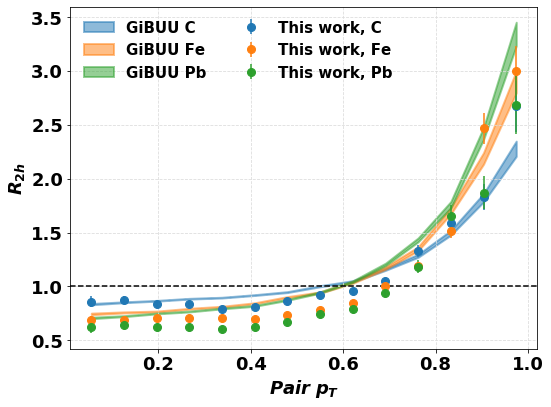

In [21]:
fig = plt.figure(figsize=(8,6))

for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], df_trigger['%s_trigger'%target],
                        df_trigger['D_%s_trigger'%target],
                        pair_cut = pair_cut_nom,trig_cut = trigger_cut_nom,                            
                            minz=0.01,maxz=1.0,nbins=15,variable='pair_pt')
    plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
                 alpha=0.99,color=colors[j+1])
    #plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                        df_trigger['GiBUU_%s_trigger'%target],df_trigger['GiBUU_D_trigger'],
                        pair_cut='',minz=0.01,maxz=1.0,nbins=15,variable='pair_pt')    
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,ms=8,lw=2)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[j+1] )

plt.xlabel('$Pair$ $p_{T}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='upper left',frameon=False,fontsize=15,ncol=2)
plt.tight_layout()
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.savefig('R2h_Pt.pdf')

# With respect to $\Delta \phi$
'dphi' is a variable , is the difference between the PhiPQ of the trigger hadron and the secondary hadron

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  a

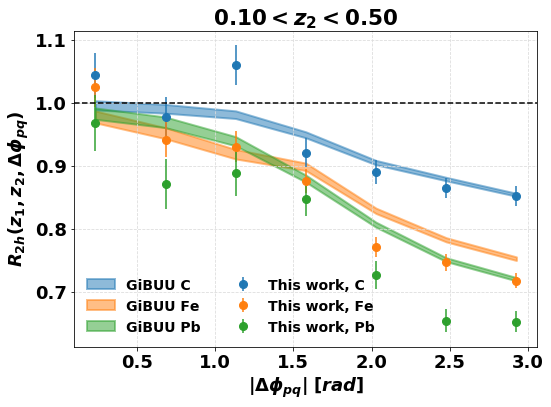

In [22]:
fig = plt.figure(figsize=(8,6))

for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14,nbins=8,variable='dphi', 
                            pair_cut = '%s and h2_z>0.1 and h2_z<0.5'%pair_cut_nom,
                            trig_cut = trigger_cut_nom )
    plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
                 alpha=0.99,color=colors[j+1])
    #plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
for j,target in enumerate(['C','Fe','Pb']):   
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                        df_trigger['GiBUU_%s_trigger'%target],df_trigger['GiBUU_D_trigger'],
                        minz=0.0,maxz=3.14,nbins=8,variable='dphi', 
                            pair_cut='and h2_z>0.1 and h2_z<0.5')
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,ms=8,lw=2)    
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[j+1])

    
plt.xlabel('$|\Delta\phi_{pq}|$ $[rad]$',fontsize=18)
plt.ylabel('$R_{2h} (z_{1},z_{2},\Delta\phi_{pq})$',fontsize=18)

#plt.xlim([0.06,0.5])
#plt.ylim([0.0,2.0])
plt.title('$0.10 < z_{2} < 0.50$')
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=14,ncol=2)
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.tight_layout()
plt.savefig('R2h_DeltaPhi.pdf', bbox_inches='tight')

In [ ]:
plt.hist(df['Fe']['dphi'],bins=100,alpha=0.5,density=True,label='Iron') # it's normalized due to the density=True!
plt.hist(df['D_Fe']['dphi'],bins=100,alpha=0.5,density=True,label='Deuterium')
plt.xlabel('dphi')
plt.ylabel('Normalized Entries')
plt.legend()
plt.show()

# As a function of the Dipion mass (GeV)
**the variable is called 'pair_mass'**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))  a

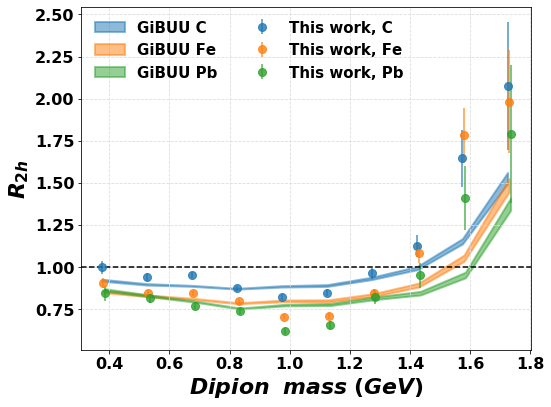

In [24]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], df_trigger['%s_trigger'%target], 
                        df_trigger['D_%s_trigger'%target],variable='pair_mass',minz=0.3,
                        maxz=1.8,nbins=11,pair_cut='%s and h2_z>0.10'%pair_cut_nom,
                            trig_cut = trigger_cut_nom, applyweight=False)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',alpha=0.8,color=colors[i+1])
    #plt.fill_between(x+0.02*i,r*1.04,r*0.96, alpha=0.2,color=colors[target])
    
    ##GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger'],variable='pair_mass',minz=0.3,maxz=1.8,
                        nbins=11,pair_cut='and h2_z>0.10',applyweight=False)
    #plt.fill_between(x,r,r-err,r+err,label='GiBUU %s'%target,alpha=0.5)
    #plt.plot(x+0.005*i,r,color=colors[target],lw=3,alpha=0.8,label='GiBUU %s'%target)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[i+1])

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.legend(frameon=False,ncol=2,loc='upper left',fontsize=15)
plt.xlabel('$Dipion$  $mass$ $(GeV)$',fontsize=22)
plt.ylabel('$R_{2h}$',fontsize=22)
plt.axhline(y=1.0,color='black',linestyle='--')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')

#plt.text(0.60, 1.1, 'CLAS \nINTERNAL', fontsize=30)
#plt.xscale('log')
#plt.ylim([0.0,1.2])
plt.tight_layout()
#plt.savefig('MainResult_withGiBUU_mass.png')
plt.savefig('DipionMass_comp.pdf', bbox_inches='tight')

# Comparing all pairs with ($\pi^{+}$$\pi^{-}$) and ($\pi^{-}$$\pi^{+}$) pairs. 
**Format is (trigger/secondary)**

In [ ]:
fig, axs = plt.subplots(3, 1,sharex=True, sharey=True,figsize=(10,8),gridspec_kw={'hspace': 0., 'wspace':0.})

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', pair_cut = '')
    if i==0:    axs[i].errorbar(x+0.005*i,r,yerr=err,label='All Pairs',fmt='o',ms=8) 
    else:    axs[i].errorbar(x+0.005*i,r,yerr=err,fmt='o',ms=8)
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', pair_cut = 'and h1_pid==211 and h2_pid==-211')
    if i==0:    axs[i].errorbar(x2+0.005*i,r2,yerr=err2,label='$\pi^{+}\pi^{-}$',fmt='o',ms=8) 
    else:    axs[i].errorbar(x2+0.005*i,r2,yerr=err2,fmt='o',ms=8)
for i,target in enumerate(['C','Fe','Pb']):    
    r3, err3,x3 = getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', pair_cut = 'and h1_pid==-211 and h2_pid==211')
    if i==0:    axs[i].errorbar(x3+0.005*i,r3,yerr=err3,label='$\pi^{-}\pi^{+}$',fmt='o',ms=8) 
    else:      axs[i].errorbar(x3+0.005*i,r3,yerr=err3,fmt='o',ms=8)

 #GiBUU    
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, pair_cut = '')
    if i==0:    axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5,label='GiBUU All Pairs')
    else:    axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and h2_pid==-211')
    if i==0:    axs[i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{+}\pi^{-}$',alpha=0.9,lw=5)
    else:    axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
for i,target in enumerate(['C','Fe','Pb']):    
    r, err,x = getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and h2_pid==211')
    if i==0:    axs[i].fill_between(x+0.005*i,r-err,r+err,label='GiBUU $\pi^{-}\pi^{+}$',alpha=0.9,lw=5)
    else:    axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
            
axs[2].set_xlabel('$z_{2}$',fontsize=18)
axs[0].set_ylabel('$R_{2h} (C)$',fontsize=18)
axs[1].set_ylabel('$R_{2h} (Fe)$',fontsize=18)
axs[2].set_ylabel('$R_{2h} (Pb)$',fontsize=18)

axs[0].set_ylim([0.4,1.5])
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.75, top=1)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=14, borderaxespad=0.3)
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.show()

**making the ratio between ($\pi^{+}\pi^{-}$)  and  ($\pi^{-}\pi^{+}$).**
**Also, MC case added**

Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==211 and h2_pid==-211
Print Trigger Cut  h1_z>0.5
Total Cut  h1_z>0.5and h1_pid==-211 and h2_pid==211
Print Trigger Cut  h1_z>0.5
Total Cut  h

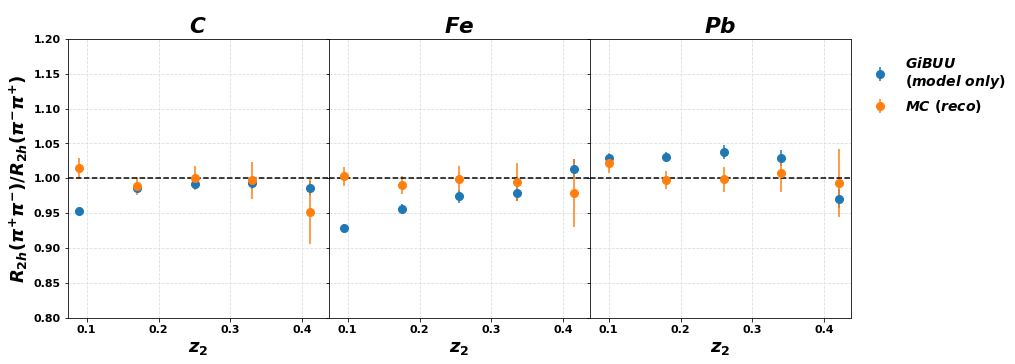

In [101]:
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(15,5),gridspec_kw={'hspace': 0., 'wspace':0.})
ratio={}
ratio_err={}
x_coor={}
BINS=6
##Data
for i,target in enumerate(['C','Fe','Pb']):    
    r2, err2,x2 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', pair_cut = 'and h1_pid==211 and h2_pid==-211',nbins=BINS)
    r3, err3,x3 = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', pair_cut = 'and h1_pid==-211 and h2_pid==211',nbins=BINS)
    ratio['%s_data'%target] = r2/r3
    x_coor['%s_data'%target]   =x2 
    ratio_err['%s_data'%target] = (r2/r3)*   np.sqrt( np.power( (err2/r2),2.0) + np.power((err3/r3) ,2.0)   ) 
    
    
    
##GiBUU    
#for i,target in enumerate(['C','Fe','Pb']):    
#    r, err,x = getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
#                        df_trigger['GiBUU_D_trigger']
#                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, pair_cut = '')
#    if i==0:    axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5,label='GiBUU All Pairs')
#    else:    axs[i].fill_between(x+0.005*i,r-err,r+err,alpha=0.9,lw=5)
for i,target in enumerate(['C','Fe','Pb']):    
    r2_GiBUU, err2_GiBUU,x2_GiBUU = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                                             df_trigger['GiBUU_%s_trigger'%target], df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and h2_pid==-211',nbins=BINS)
    r3_GiBUU, err3_GiBUU,x3_GiBUU = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                                             df_trigger['GiBUU_%s_trigger'%target],df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and h2_pid==211',nbins=BINS)
    ratio['%s_GiBUU'%target] = r2_GiBUU/r3_GiBUU
    ratio_err['%s_GiBUU'%target] = (r2_GiBUU/r3_GiBUU)*   np.sqrt( np.power( (err2_GiBUU/r2_GiBUU),2.0) + 
                                                                  np.power((err3_GiBUU/r3_GiBUU) ,2.0)   )
## MC
for i,target in enumerate(['C','Fe','Pb']):    
    r2_mc, err2_mc,x2_mc = r2h.getRatio(df_mc['%s'%target],df_mc['D'],
                                             df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==211 and h2_pid==-211',nbins=BINS)    
    r3_mc, err3_mc,x3_mc = r2h.getRatio(df_mc['%s'%target],df_mc['D'],
                                             df_mc_trigger['%s_trigger'%target], df_mc_trigger['D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = 'and h1_pid==-211 and h2_pid==211',nbins=BINS)     
    ratio['%s_mc'%target] = r2_mc/r3_mc
    ratio_err['%s_mc'%target] = (r2_mc/r3_mc)*   np.sqrt( np.power( (err2_mc/r2_mc),2.0) + 
                                                                  np.power((err3_mc/r3_mc) ,2.0)   )    
    
    
alpha_value=0.5
        
    
for i,target in enumerate(['C','Fe','Pb']): 
#    if i==0:    
#        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target],
#                                yerr=ratio_err['%s_data'%target],label='$Data$',fmt='o',ms=8)
#        axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target]-ratio_err['%s_data'%target],
#                            ratio['%s_data'%target]+ratio_err['%s_data'%target],alpha=alpha_value,lw=5)
        
#    else:      
#        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target],
#                               yerr=ratio_err['%s_data'%target],fmt='o',ms=8)
#        axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_data'%target]-ratio_err['%s_data'%target],
#                            ratio['%s_data'%target]+ratio_err['%s_data'%target],alpha=alpha_value,lw=5)
    if i==0:    
        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_GiBUU'%target],
                                yerr=ratio_err['%s_GiBUU'%target],
                                label='$GiBUU$ \n$(model$ $only)$',fmt='o',ms=8)
        #axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_GiBUU'%target]-ratio_err['%s_GiBUU'%target],
        #                    ratio['%s_GiBUU'%target]+ratio_err['%s_GiBUU'%target],alpha=alpha_value,
        #                    lw=5,label='$GiBUU$ \n$(model$ $only)$',)
    else:      
        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_GiBUU'%target],
                               yerr=ratio_err['%s_GiBUU'%target],fmt='o',ms=8)
        #axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_GiBUU'%target]-ratio_err['%s_GiBUU'%target],
        #                    ratio['%s_GiBUU'%target]+ratio_err['%s_GiBUU'%target],alpha=alpha_value,lw=5)
        
    if i==0:    
        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_mc'%target],
                                yerr=ratio_err['%s_mc'%target],
                                label='$MC$ $(reco)$',fmt='o',ms=8)
        #axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_mc'%target]-ratio_err['%s_mc'%target],
        #                    ratio['%s_mc'%target]+ratio_err['%s_mc'%target],alpha=alpha_value,lw=5, 
        #                    label='$MC$ $(reco)$')
    else:      
        axs[i].errorbar(x_coor['%s_data'%target]+0.005*i,ratio['%s_mc'%target],
                               yerr=ratio_err['%s_mc'%target],fmt='o',ms=8)
        #axs[i].fill_between(x_coor['%s_data'%target]+0.005*i,ratio['%s_mc'%target]-ratio_err['%s_mc'%target],
        #                    ratio['%s_mc'%target]+ratio_err['%s_mc'%target],alpha=alpha_value,lw=5)
        
for i in range(3):    axs[i].set_xlabel('$z_{2}$',fontsize=18)

axs[0].set_ylabel('$R_{2h} (\pi^{+}\pi^{-}) / R_{2h} (\pi^{-}\pi^{+})$',fontsize=18)
axs[0].set_title('$C$')
axs[1].set_title('$Fe$')
axs[2].set_title('$Pb$')


axs[0].set_ylim([0.8,1.2])
#axs[0].set_xlim([0.00,0.5])
for i in range(0,3):    
    axs[i].axhline(y=1.0,color='black',linestyle='--')
    #axs[i].legend(loc='best',frameon=False,fontsize=13.5,ncol=2 )
    axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
    axs[i].tick_params(axis='y', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.85, top=0.9)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=14, borderaxespad=0.3, title='\n')
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.yscale('log')
plt.savefig('ComparisonDataGiBUUMC_chargedSeparatedPairs.pdf', bbox_inches='tight')
plt.show()

# Data/MC comparison distributions

In [ ]:
vars=[]
n_row=4
n_col=4
tar='D_Fe'
tar_mc='D'
nbins=70
vars=df[tar].keys()
vars = vars[-16:] ## we select the last 16 variables to plot, from Q2 down below
print ('There are ', len(df['Fe'].columns), ' in total for ', tar)
fig, axs = plt.subplots(n_row, n_col,sharex=False, sharey=False,figsize=(14,14),
                        gridspec_kw={'hspace': 0.4, 'wspace':0.7})
for j in range(n_row):
    for i in range(n_col):
        axs[j,i].hist(df[tar][vars[i+n_col*j]],bins=nbins,alpha=0.5,density=True,
                      label=' Data'if i+j == 0 else "")
        axs[j,i].hist(df_mc[tar_mc][vars[i+n_col*j]],bins=nbins,alpha=0.5,density=True,
                      label='  MC\n(reco)'if i+j == 0 else "")
        axs[j,i].set_xlabel(vars[i+n_col*j],fontsize=13)
        axs[j,i].set_ylabel('Entries',fontsize=13)
        axs[j,i].tick_params(axis='y', which='major', labelsize=8)
        axs[j,i].tick_params(axis='x', which='major', labelsize=8)
axs[3,3].set_xlim(-0.1,2.2)
plt.subplots_adjust(right=0.9, top=1)
fig.legend(loc='upper right',ncol=1,frameon=False,fontsize=13, title='\n')
plt.savefig('data_MC_comparison_%s.pdf'%tar, bbox_inches='tight')

In [ ]:
tar='D_Fe'
tar_mc='D'
vars=df[tar].keys()
print(vars[-16:])
print(vars)

# Mix Events

**data**

In [70]:
%%time
df_mix = {}
#path_data="/home/seba/CreatePairTuples"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df_mix[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), '%s_mix'%target)
    df_mix['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s_mix'%target)  


Getting dataframes from target C
Getting dataframes from target Fe
Getting dataframes from target Pb
CPU times: user 3.91 s, sys: 80.4 ms, total: 3.99 s
Wall time: 4.16 s


**Aplying the cuts to mix events**

In [61]:
%%time
for key in df_mix.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    df_mix[key] = r2h.applyCuts(df_mix[key],isMC=isMC)
    df_mix[key] = r2h.applyCutsPair(df_mix[key],isMC=isMC)


key:  C
Entries before cut  173640
Q2>1.0 and Q2<4.0 173640  (100.00  %)
h1_p<5.0  173640  (100.00  %)
inelasticity < 0.85 173640  (100.00  %)
h1_pid = pions (trigger) 173640  (100.00  %)
Nu>2.2 and Nu<4.2 173640  (100.00  %)
h1_z <1.0 173640  (100.00  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 173640  (100.00  %)
2.2 < nu < 4.2 173640  (100.00  %)
h1_p<5 GeV  173640  (100.00  %)
h2_p<5 GeV 173640  (100.00  %)
secondary hadrons are pions 173640  (100.00  %)
leading hadrons are pions 173640  (100.00  %)
0.2<h2_p<5.0 173640  (100.00  %)
0.2<h1_p<5.0 173640  (100.00  %)
h2_z<1.0 173640  (100.00  %)
h1_z<1.0 173640  (100.00  %)
10<h2_th<120 173640  (100.00  %)
Theta/P fiducial region selected 173640  (100.00  %)
10< h1_th<120 173640  (100.00  %)
Theta/P fiducial region selected for trigger 173640  (100.00  %)

key:  D_C
Entries before cut  243304
Q2>1.0 and Q2<4.0 243304  (100.00  %)
h1_p<5.0  243304  (100.00  %)
inelasticity < 0.85 243304  (100.00  %)
h1_pid = pions (

In [47]:
for key in df_trigger.keys():
    print (key)
    df_trigger[key] = r2h.applyCuts(df_trigger[key],isTrigger=True)
    print (' ')

C_trigger
Entries before cut  642418
Q2>1.0 and Q2<4.0 642418  (100.00  %)
h1_p<5.0  642418  (100.00  %)
inelasticity < 0.85 642418  (100.00  %)
h1_pid = pions (trigger) 642418  (100.00  %)
Nu>2.2 and Nu<4.2 642418  (100.00  %)
h1_z <1.0 642418  (100.00  %)
 
D_C_trigger
Entries before cut  862386
Q2>1.0 and Q2<4.0 862386  (100.00  %)
h1_p<5.0  862386  (100.00  %)
inelasticity < 0.85 862386  (100.00  %)
h1_pid = pions (trigger) 862386  (100.00  %)
Nu>2.2 and Nu<4.2 862386  (100.00  %)
h1_z <1.0 862386  (100.00  %)
 
Fe_trigger
Entries before cut  752018
Q2>1.0 and Q2<4.0 752018  (100.00  %)
h1_p<5.0  752018  (100.00  %)
inelasticity < 0.85 752018  (100.00  %)
h1_pid = pions (trigger) 752018  (100.00  %)
Nu>2.2 and Nu<4.2 752018  (100.00  %)
h1_z <1.0 752018  (100.00  %)
 
D_Fe_trigger
Entries before cut  1279672
Q2>1.0 and Q2<4.0 1279672  (100.00  %)
h1_p<5.0  1279672  (100.00  %)
inelasticity < 0.85 1279672  (100.00  %)
h1_pid = pions (trigger) 1279672  (100.00  %)
Nu>2.2 and Nu<4.2 1

In [48]:
print( 'There are ', len(df_mix['Fe'].keys()) , 'variables in mix_tuple')
print(df_mix['C'].keys())

df_mc_mix['Pb'].hist(figsize=(20,20),bins=100)
plt.show()


There are  44 variables in mix_tuple
Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'x', 'u',
       'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'dphi_norot', 'h2_cm_ph_norot',
       'h2_cm_th_norot', '__index__', 'inelasticity', 'h1_e', 'h1_p', 'z_tot',
       'h2_e', 'h2_p', 'pair_pt2'],
      dtype='object')


NameError: name 'df_mc_mix' is not defined

**MC**

In [49]:
%%time
df_mc_mix = {}
path_mc="/home/seba/CreatePairTuples"

for target in ['C','D', 'Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df_mc_mix[target]=getdatainChunks('%s/MC_Pairs_%s.root'%(path_mc,target), '%s_mix'%target)
 

Getting dataframes from target C
Getting dataframes from target D
Getting dataframes from target Fe
Getting dataframes from target Pb
CPU times: user 23.8 s, sys: 518 ms, total: 24.3 s
Wall time: 24.3 s


In [ ]:
plt.hist(df['Fe']['h1_p'],bins=100,alpha=0.5,density=True,label='Deuterium')
plt.hist(df_mc['Fe']['h1_p'],bins=100,alpha=0.5,density=True,label='Iron') 

plt.yscale('log')
#plt.xlim(100,125)
plt.xlabel('dphi')
plt.ylabel('Normalized Entries')
#plt.legend()
plt.show()

In [50]:
%%time
for key in df_mc_mix.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print (key)
    df_mc_mix[key] = r2h.applyCuts(df_mc_mix[key],isMC=isMC)
    df_mc_mix[key] = r2h.applyCutsPair(df_mc_mix[key],isMC=isMC)    
    df_mc_mix[key] = r2h.applyCuts(df_mc_mix[key],isMC=isMC)
    df_mc_mix[key] = r2h.applyCutsPair(df_mc_mix[key],isMC=isMC)

C
Entries before cut  3828317
Q2>1.0 and Q2<4.0 3828317  (100.00  %)
h1_p<5.0  3828311  (100.00  %)
inelasticity < 0.85 3828311  (100.00  %)
h1_pid = pions (trigger) 1513966  (39.55  %)
Nu>2.2 and Nu<4.2 1493447  (98.64  %)
h1_z <1.0 1493002  (99.97  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 1493002  (100.00  %)
2.2 < nu < 4.2 1493002  (100.00  %)
h1_p<5 GeV  1493002  (100.00  %)
h2_p<5 GeV 1492937  (100.00  %)
secondary hadrons are pions 953512  (63.87  %)
leading hadrons are pions 953512  (100.00  %)
0.2<h2_p<5.0 925209  (97.03  %)
0.2<h1_p<5.0 925209  (100.00  %)
h2_z<1.0 925122  (99.99  %)
h1_z<1.0 925122  (100.00  %)
10<h2_th<120 638037  (68.97  %)
Theta/P fiducial region selected 556379  (87.20  %)
10< h1_th<120 556379  (100.00  %)
Theta/P fiducial region selected for trigger 556379  (100.00  %)
Entries before cut  556379
Q2>1.0 and Q2<4.0 556379  (100.00  %)
h1_p<5.0  556379  (100.00  %)
inelasticity < 0.85 556379  (100.00  %)
h1_pid = pions (trigger) 556379

**This is normalized by are not by trigger**

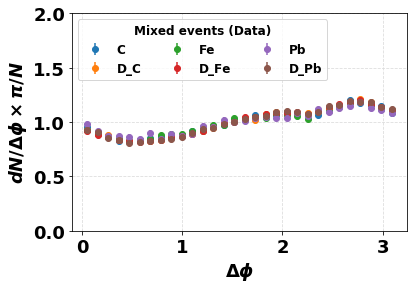

In [64]:
nbins = 30
dys = []
ys = []
for tar in ['C','D_C','Fe','D_Fe','Pb','D_Pb']:
    a=df_mix[tar]['dphi']
    rang=None
    if rang == None:        rang=(min(a),max(a))
    y,x = np.histogram(a,bins=nbins) ## this return the y array of values and the x arrays of bin edges 
    #print(y)
    #print(x)
    #print(x[1] ,' ; ', x[0])
    y = pd.Series(y)
    denom = np.sum(y)*(x[1]-x[0])/(rang[1]-rang[0])
    #print('denom is ',denom)
    #print(rang[1]-rang[0])
    dy = np.sqrt(y)/denom
    y = y/denom
    dys.append(dy)
    ys.append(y)
    x = np.add(x[1:],x[:-1])/2
    plt.errorbar(x,y,dy,linestyle='',marker='o',label=tar)
plt.legend(ncol=3, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (Data)', title_fontsize=12)
plt.ylim(0.,2.0)
plt.gca().set_xlabel("$\\Delta\\phi$") #gca stands for 'get current axis'
plt.gca().set_ylabel("$dN/\\Delta\\phi \\times \pi/N$") #gca stands for 'get current axis'

plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )
plt.savefig('dphi_mixedEvents_comp_data.pdf', bbox_inches='tight')

In [82]:
def getMultiplicity(df,df_trigger, variable='h2_z',trig_cut = 'h1_z>0.5', pair_cut='',minz=0.05,maxz=0.5,
                    nbins=9, applyweight=False):
    norm = df_trigger.query(trig_cut).shape[0]
    bins= np.linspace(minz,maxz,nbins)
    y, x = np.histogram(df.query(pair_cut)[variable],bins=bins)
    erry, x = np.histogram(df.query(pair_cut)[variable],bins=bins)
    x = (x[1:] + x[:-1])/2.0
    err = np.true_divide(np.sqrt(erry),y)
    y = np.true_divide(y,norm)
    return y,err,x


In [83]:
print(df_mix['C'].columns)

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'dphi_norot', 'h2_cm_ph_norot', 'h2_cm_th_norot',
       'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector',
       'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_Chi2CC', 'h2_Chi2CC',
       'h1_StatCC', 'h2_StatCC'],
      dtype='object')


**This is normalized by trigger**

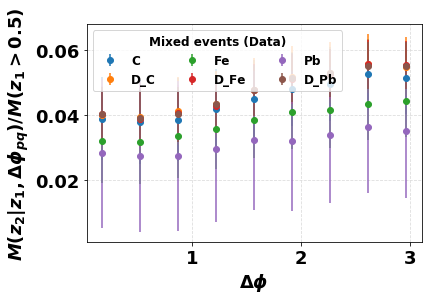

In [86]:
## NOT FINISH!

for j,tar in enumerate(['C','D_C','Fe','D_Fe','Pb','D_Pb']):
    r, err,x = getMultiplicity(df=df_mix[tar],df_trigger=df_trigger['%s_trigger'%tar], variable='dphi',
                               minz=0.0,maxz=3.14,nbins=10,
                               trig_cut='%s and h1_z>0.5'%trigger_cut_nom,
                               pair_cut = 'h2_z>0.1 %s '%pair_cut_nom)
    plt.errorbar(x,r,err,linestyle='',marker='o',label=tar)
                               
plt.legend(ncol=3, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (Data)', title_fontsize=12)
#plt.ylim(0.,2.0)
plt.gca().set_xlabel("$\\Delta\\phi$") #gca stands for 'get current axis'
plt.gca().set_ylabel("$M(z_{2}|z_{1},\Delta \phi_{pq})/M(z_{1}>0.5)$") #gca stands for 'get current axis'

plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )
#plt.savefig('dphi_mixedEvents_comp_data.pdf', bbox_inches='tight')




**MC case**

In [ ]:
nbins = 30
dys = []
ys = []
for tar in ['C','D','Fe','Pb']:
    a=df_mc_mix[tar]['dphi']
    rang=None
    if rang == None:        rang=(min(a),max(a))
    y,x = np.histogram(a,bins=nbins) ## this return the y array of values and the x arrays of bin edges 
    #print(y)
    #print(x)
    #print(x[1] ,' ; ', x[0])
    y = pd.Series(y)
    denom = np.sum(y)*(x[1]-x[0])/(rang[1]-rang[0])
    #print('denom is ',denom)
    #print(rang[1]-rang[0])
    dy = np.sqrt(y)/denom
    y = y/denom
    dys.append(dy)
    ys.append(y)
    x = np.add(x[1:],x[:-1])/2
    plt.errorbar(x,y,dy,linestyle='',marker='o',label=tar)
plt.legend(ncol=2, loc='upper left' ,frameon=True,fontsize=12, title='Mixed events (MC)', title_fontsize=12)
plt.ylim(0.7,1.4)
plt.gca().set_xlabel("$\\Delta\\phi$") #gca stands for 'get current axis'
plt.gca().set_ylabel("$dN/\\Delta\\phi \\times \pi/N$") #gca stands for 'get current axis'

plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )
plt.savefig('dphi_mixedEvents_comp_MC.pdf', bbox_inches='tight')

**Including the ratios Nuclear event-mixed / D event-mixed**

In [ ]:
nbins = 30
dys = []
ys = []
for tar in ['C','D_C','Fe','D_Fe','Pb','D_Pb']:
    a=df[tar]['dphi']
    rang=None
    if rang == None:        rang=(min(a),max(a))
    y,x = np.histogram(a,bins=nbins) 
    y = pd.Series(y)
    denom = np.sum(y)*(x[1]-x[0])/(rang[1]-rang[0])
    dy = np.sqrt(y)/denom
    y = y/denom
    dys.append(dy)
    ys.append(y)
    x = np.add(x[1:],x[:-1])/2
    plt.errorbar(x,y,dy,linestyle='',marker='o',label=tar)
plt.legend(ncol=3, loc='upper left' ,frameon=True,fontsize=12, title='Data', title_fontsize=12)
plt.ylim(0.,2.51)
plt.gca().set_xlabel("$\\Delta\\phi$") #gca stands for 'get current axis'
plt.gca().set_ylabel("$dN/\\Delta\\phi \\times \pi/N$") #gca stands for 'get current axis'

plt.grid(b=True, which='both', axis='both',color='gainsboro', linestyle='dashed' )
plt.savefig('dphi_Events_comp_data.pdf', bbox_inches='tight')

**Study the Xf cut. No notizable difference wrt not applying the cut**

Print Trigger Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -1 ))   and h1_xf>0
Total Cut  h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h1_Nphe> (15*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==211 ) ) ) and h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(2*2) and h1_pid==21

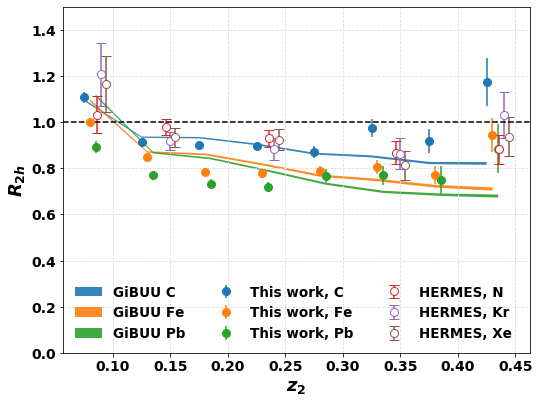

In [15]:
fig = plt.figure(figsize=(8,6))

for i,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.05,maxz=0.45, variable='h2_z', 
                        pair_cut = '%s and h1_xf>0'%pair_cut_nom,
                            trig_cut = '%s and h1_xf>0'%trigger_cut_nom)
    plt.errorbar(x+0.005*i,r,yerr=err,label='This work, %s'%target,fmt='o',ms=8) ## 'fmt' is for formatting


    
for i,target in enumerate(['C','Fe','Pb']):    
#plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
#alpha=0.99,color=colors[target])
#plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],df_trigger['GiBUU_%s_trigger'%target],
                        df_trigger['GiBUU_D_trigger']
                       ,variable='h2_z',minz=0.05,maxz=0.45, applyweight=False, 
                        pair_cut = '')
    #plt.fill_between(x,r,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
    #plt.plot(x,r,label='GiBUU %s'%target,alpha=0.79,lw=3,color=colors[target])
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,fmt='o',ms=8)
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.9,lw=5)
plt.xlabel('$z_{2}$',fontsize=18)
plt.ylabel('$R_{2h}$',fontsize=18)


plt.errorbar(hermes_x['N'], hermes_y['N'],yerr=hermes_ytotal['N'],fmt='o',mfc='white',
             label='HERMES, N',fillstyle=None,ms=8,capsize=5)
plt.errorbar(hermes_x['Kr'], hermes_y['Kr'],yerr=hermes_ytotal['Kr'],fmt='o',mfc='white',
             label='HERMES, Kr',fillstyle=None,ms=8,capsize=5)
plt.errorbar(hermes_x['Xe'], hermes_y['Xe'],yerr=hermes_ytotal['Xe'],fmt='o',mfc='white',
             label='HERMES, Xe',fillstyle=None,ms=8,capsize=5)
#plt.errorbar(neutrino_x, neutrino_y,yerr=neutrino_yerror,fmt='s',mfc='white',
            #label='Neutrino, $A_{eff}=21$',fillstyle=None,ms=8,capsize=5)

plt.ylim([0.,1.5])
#plt.xlim([0.00,0.5])
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=13.5,ncol=3 )

plt.tight_layout()
#plt.savefig('ComparisonWithHermes_Linear.png')
#plt.ylim([0.55,1.85]) 

#plt.yscale('log')
#plt.savefig('ComparisonWithHermes_Log.png')
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.xticks(np.arange(0.1,0.5,0.05),fontsize=14)
plt.yticks(fontsize=14)


plt.savefig('ComparisonWithHermes_XfCut.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))

for j,target in enumerate(['C','Fe','Pb']):
    r, err,x = r2h.getRatio(df['%s'%target], df['D_%s'%target], 
                        df_trigger['%s_trigger'%target], df_trigger['D_%s_trigger'%target],
                        minz=0.0,maxz=3.14,nbins=8,variable='dphi', 
                            pair_cut = '%s and h2_z>0.1 and h2_z<0.5'%pair_cut_nom,
                            trig_cut = trigger_cut_nom )
    plt.errorbar(np.subtract(x,-i*0.005),r,yerr=err,label='This work, %s'%target,ms=8,fmt='o',
                 alpha=0.99,color=colors[j+1])
    #plt.fill_between(np.subtract(x,-i*0.005), r*0.94,r*1.04, color=colors[target],alpha=0.2)
    
for j,target in enumerate(['C','Fe','Pb']):   
    #GiBUU
    r, err,x = r2h.getRatio(df['GiBUU_%s'%target],df['GiBUU_D'],
                        df_trigger['GiBUU_%s_trigger'%target],df_trigger['GiBUU_D_trigger'],
                        minz=0.0,maxz=3.14,nbins=8,variable='dphi', 
                            pair_cut='and h2_z>0.1 and h2_z<0.5')
    #plt.errorbar(x,r,yerr=err,label='GiBUU %s'%target,ms=8,lw=2)    
    plt.fill_between(x+0.005*i,r-err,r+err,label='GiBUU %s'%target,alpha=0.5,lw=2,color=colors[j+1])

    
plt.xlabel('$|\Delta\phi_{pq}|$ $[rad]$',fontsize=18)
plt.ylabel('$R_{2h} (z_{1},z_{2},\Delta\phi_{pq})$',fontsize=18)

#plt.xlim([0.06,0.5])
#plt.ylim([0.0,2.0])
plt.title('$0.10 < z_{2} < 0.50$')
plt.axhline(y=1.0,color='black',linestyle='--')
plt.legend(loc='best',frameon=False,fontsize=14,ncol=2)
plt.grid(True, axis='x',color='gainsboro', linestyle='dashed')
plt.grid(True, axis='y',color='gainsboro', linestyle='dashed')
plt.tight_layout()
#plt.savefig('R2h_DeltaPhi.pdf', bbox_inches='tight')


